In [1]:
!pip install tensorflow

In [2]:
!pip install mediapipe

In [3]:
!pip install sklearn

In [4]:
!pip install matplotlib

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [142]:
cap = cv2.VideoCapture("help(5).mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [143]:
results


mediapipe.python.solution_base.SolutionOutputs

In [144]:
draw_landmarks(frame, results)

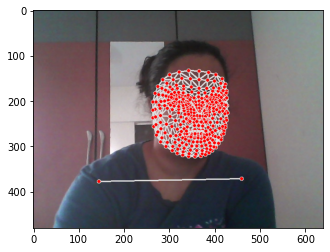

In [145]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [146]:
len(results.face_landmarks.landmark)

468

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.4098193 ,  0.56066984, -0.61944854, ...,  0.11716354,
        0.43325537, -0.04459563])

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.4098193 ,  0.56066984, -0.61944854, ...,  0.11716354,
        0.43325537, -0.04459563])

In [56]:
for sequence in range(no_sequences):
    try:
        os.makedirs(os.path.join(DATA_PATH,"howarethings",str(sequence)))
    except:
        pass

# Collecting dataset now

In [55]:
cap=cv2.VideoCapture("ISL_Videos/how are things/things.mp4")
while(cap.isOpened()):
    ret,frame=cap.read()
    if ret== True:
        cv2.imshow('Frame',frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()


In [57]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for sequence in range(no_sequences):
        for frame_num in range(sequence_length):
            cap=cv2.VideoCapture("ISL_Videos/how are things/things.mp4")
            ret, frame = cap.read()
            if ret==True:
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image,results)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, "howarethings", str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
            

In [58]:
my_list = os.listdir('MP_Data')

In [86]:
actions=np.array(my_list)

In [87]:
actions

array(['action', 'areyoufreetoday', 'areyouhidingsomething',
       'bringwaterforme', 'canihelpyou', 'canyourepeatthatplease',
       'combyourhair', 'congratulations', 'couldyoupleasetalkslower',
       'domeafavour', 'donotabusehim', 'donotbestubborn', 'donothurtme',
       'donotmakemeangry', 'donottakeittotheheart', 'donotworry',
       'doyouneedsomething', 'goandsleep', 'hadyourfood', 'hecamebytrain',
       'heisgoingintotheroom', 'heismyfriend', 'heisontheway', 'hello',
       'helpme', 'hewouldbecomingtoday', 'hihowareyou', 'howarethings',
       'iloveyou', 'thanks'], dtype='<U24')

In [68]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [60]:
label_map = {label:num for num, label in enumerate(my_list)}

In [61]:
label_map

{'action': 0,
 'areyoufreetoday': 1,
 'areyouhidingsomething': 2,
 'bringwaterforme': 3,
 'canihelpyou': 4,
 'canyourepeatthatplease': 5,
 'combyourhair': 6,
 'congratulations': 7,
 'couldyoupleasetalkslower': 8,
 'domeafavour': 9,
 'donotabusehim': 10,
 'donotbestubborn': 11,
 'donothurtme': 12,
 'donotmakemeangry': 13,
 'donottakeittotheheart': 14,
 'donotworry': 15,
 'doyouneedsomething': 16,
 'goandsleep': 17,
 'hadyourfood': 18,
 'hecamebytrain': 19,
 'heisgoingintotheroom': 20,
 'heismyfriend': 21,
 'heisontheway': 22,
 'hello': 23,
 'helpme': 24,
 'hewouldbecomingtoday': 25,
 'hihowareyou': 26,
 'howarethings': 27,
 'iloveyou': 28,
 'thanks': 29}

In [88]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [89]:
np.array(sequences).shape

(900, 30, 1662)

In [90]:
np.array(labels).shape

(900,)

In [91]:
X = np.array(sequences)

In [92]:
X.shape

(900, 30, 1662)

In [93]:
y = to_categorical(labels).astype(int)

In [94]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [96]:
y_test.shape

(45, 30)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [74]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [97]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [98]:
res = [.7, 0.2, 0.1]

In [99]:
actions[np.argmax(res)]

'action'

In [100]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [101]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
27/27 [==============================] - 13s 98ms/step - loss: 3.4473 - categorical_accuracy: 0.0421
Epoch 2/2000
27/27 [==============================] - 3s 98ms/step - loss: 3.2178 - categorical_accuracy: 0.0713
Epoch 3/2000
27/27 [==============================] - 3s 92ms/step - loss: 2.9777 - categorical_accuracy: 0.1181
Epoch 4/2000
27/27 [==============================] - 3s 96ms/step - loss: 2.7992 - categorical_accuracy: 0.1275
Epoch 5/2000
27/27 [==============================] - 3s 95ms/step - loss: 2.6988 - categorical_accuracy: 0.1298
Epoch 6/2000
27/27 [==============================] - 2s 88ms/step - loss: 2.4844 - categorical_accuracy: 0.1579
Epoch 7/2000
27/27 [==============================] - 2s 89ms/step - loss: 2.2429 - categorical_accuracy: 0.2129
Epoch 8/2000
27/27 [==============================] - 2s 88ms/step - loss: 2.4437 - categorical_accuracy: 0.2047
Epoch 9/2000
27/27 [==============================] - 2s 88ms/step - loss: 2.2468 - categorical

27/27 [==============================] - 2s 90ms/step - loss: 1.3625 - categorical_accuracy: 0.4515
Epoch 144/2000
27/27 [==============================] - 2s 91ms/step - loss: 1.2784 - categorical_accuracy: 0.5135
Epoch 145/2000
27/27 [==============================] - 2s 88ms/step - loss: 1.3441 - categorical_accuracy: 0.4713
Epoch 146/2000
27/27 [==============================] - 2s 90ms/step - loss: 1.5275 - categorical_accuracy: 0.3918
Epoch 147/2000
27/27 [==============================] - 2s 89ms/step - loss: 1.3286 - categorical_accuracy: 0.4842
Epoch 148/2000
27/27 [==============================] - 2s 91ms/step - loss: 1.2625 - categorical_accuracy: 0.5216
Epoch 149/2000
27/27 [==============================] - 2s 89ms/step - loss: 1.2188 - categorical_accuracy: 0.5287
Epoch 150/2000
27/27 [==============================] - 2s 91ms/step - loss: 1.2707 - categorical_accuracy: 0.4901
Epoch 151/2000
27/27 [==============================] - 2s 92ms/step - loss: 1.2723 - categoric

27/27 [==============================] - 3s 94ms/step - loss: 1.1388 - categorical_accuracy: 0.5450
Epoch 286/2000
27/27 [==============================] - 2s 91ms/step - loss: 0.9953 - categorical_accuracy: 0.6281
Epoch 287/2000
27/27 [==============================] - 2s 89ms/step - loss: 0.9111 - categorical_accuracy: 0.6725
Epoch 288/2000
27/27 [==============================] - 2s 92ms/step - loss: 0.9688 - categorical_accuracy: 0.6222
Epoch 289/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.8834 - categorical_accuracy: 0.6725
Epoch 290/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.8733 - categorical_accuracy: 0.6760
Epoch 291/2000
27/27 [==============================] - 3s 101ms/step - loss: 0.8670 - categorical_accuracy: 0.6702
Epoch 292/2000
27/27 [==============================] - 3s 102ms/step - loss: 1.0705 - categorical_accuracy: 0.5848
Epoch 293/2000
27/27 [==============================] - 3s 107ms/step - loss: 1.0047 - catego

27/27 [==============================] - 2s 89ms/step - loss: 0.7730 - categorical_accuracy: 0.7088
Epoch 428/2000
27/27 [==============================] - 2s 89ms/step - loss: 0.7867 - categorical_accuracy: 0.6982
Epoch 429/2000
27/27 [==============================] - 2s 89ms/step - loss: 0.9230 - categorical_accuracy: 0.6363
Epoch 430/2000
27/27 [==============================] - 2s 89ms/step - loss: 0.7699 - categorical_accuracy: 0.7205
Epoch 431/2000
27/27 [==============================] - 2s 89ms/step - loss: 0.8053 - categorical_accuracy: 0.7029
Epoch 432/2000
27/27 [==============================] - 2s 91ms/step - loss: 0.9862 - categorical_accuracy: 0.6129
Epoch 433/2000
27/27 [==============================] - 2s 91ms/step - loss: 0.8494 - categorical_accuracy: 0.6760
Epoch 434/2000
27/27 [==============================] - 2s 89ms/step - loss: 0.7984 - categorical_accuracy: 0.6971
Epoch 435/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.8360 - categoric

27/27 [==============================] - 3s 97ms/step - loss: 53.3433 - categorical_accuracy: 0.4491
Epoch 570/2000
27/27 [==============================] - 3s 94ms/step - loss: 5.6155 - categorical_accuracy: 0.5111
Epoch 571/2000
27/27 [==============================] - 3s 97ms/step - loss: 2.0317 - categorical_accuracy: 0.6047
Epoch 572/2000
27/27 [==============================] - 3s 98ms/step - loss: 4.1157 - categorical_accuracy: 0.6222
Epoch 573/2000
27/27 [==============================] - 3s 103ms/step - loss: 1.6423 - categorical_accuracy: 0.6175
Epoch 574/2000
27/27 [==============================] - 3s 96ms/step - loss: 1.1722 - categorical_accuracy: 0.5696
Epoch 575/2000
27/27 [==============================] - 3s 99ms/step - loss: 1.0479 - categorical_accuracy: 0.6643
Epoch 576/2000
27/27 [==============================] - 2s 92ms/step - loss: 1.4120 - categorical_accuracy: 0.6982
Epoch 577/2000
27/27 [==============================] - 2s 92ms/step - loss: 0.9427 - categor

Epoch 711/2000
27/27 [==============================] - 3s 94ms/step - loss: 0.4416 - categorical_accuracy: 0.8047
Epoch 712/2000
27/27 [==============================] - 3s 94ms/step - loss: 1.4948 - categorical_accuracy: 0.5977
Epoch 713/2000
27/27 [==============================] - 3s 100ms/step - loss: 0.7194 - categorical_accuracy: 0.7439
Epoch 714/2000
27/27 [==============================] - 3s 98ms/step - loss: 0.4299 - categorical_accuracy: 0.8374
Epoch 715/2000
27/27 [==============================] - 3s 95ms/step - loss: 0.3785 - categorical_accuracy: 0.8749
Epoch 716/2000
27/27 [==============================] - 3s 104ms/step - loss: 0.3468 - categorical_accuracy: 0.8865
Epoch 717/2000
27/27 [==============================] - 3s 118ms/step - loss: 0.2925 - categorical_accuracy: 0.9064
Epoch 718/2000
27/27 [==============================] - 3s 119ms/step - loss: 0.3050 - categorical_accuracy: 0.8912
Epoch 719/2000
27/27 [==============================] - 3s 112ms/step - loss

27/27 [==============================] - 2s 87ms/step - loss: 0.4420 - categorical_accuracy: 0.8433
Epoch 783/2000
27/27 [==============================] - 2s 85ms/step - loss: 0.3791 - categorical_accuracy: 0.8678
Epoch 784/2000
27/27 [==============================] - 2s 87ms/step - loss: 0.3493 - categorical_accuracy: 0.8959
Epoch 785/2000
27/27 [==============================] - 2s 86ms/step - loss: 0.3381 - categorical_accuracy: 0.8854
Epoch 786/2000
27/27 [==============================] - 2s 86ms/step - loss: 0.4269 - categorical_accuracy: 0.8386
Epoch 787/2000
27/27 [==============================] - 2s 85ms/step - loss: 0.5538 - categorical_accuracy: 0.7953
Epoch 788/2000
27/27 [==============================] - 2s 87ms/step - loss: 0.5605 - categorical_accuracy: 0.7860
Epoch 789/2000
27/27 [==============================] - 2s 86ms/step - loss: 0.4113 - categorical_accuracy: 0.8526
Epoch 790/2000
27/27 [==============================] - 2s 86ms/step - loss: 0.3536 - categoric

27/27 [==============================] - 2s 90ms/step - loss: 0.2210 - categorical_accuracy: 0.9240
Epoch 925/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.1971 - categorical_accuracy: 0.9357
Epoch 926/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.1862 - categorical_accuracy: 0.9450
Epoch 927/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.2294 - categorical_accuracy: 0.9158
Epoch 928/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.5515 - categorical_accuracy: 0.8105
Epoch 929/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.3632 - categorical_accuracy: 0.8585
Epoch 930/2000
27/27 [==============================] - 2s 91ms/step - loss: 0.2788 - categorical_accuracy: 0.9018
Epoch 931/2000
27/27 [==============================] - 2s 90ms/step - loss: 0.2151 - categorical_accuracy: 0.9275
Epoch 932/2000
27/27 [==============================] - 2s 91ms/step - loss: 0.2137 - categoric

27/27 [==============================] - 2s 91ms/step - loss: 2.8118 - categorical_accuracy: 0.1392
Epoch 1066/2000
27/27 [==============================] - 2s 91ms/step - loss: 2.8287 - categorical_accuracy: 0.1333
Epoch 1067/2000
27/27 [==============================] - 2s 91ms/step - loss: 2.8222 - categorical_accuracy: 0.1298
Epoch 1068/2000
27/27 [==============================] - 2s 89ms/step - loss: 2.8113 - categorical_accuracy: 0.1380
Epoch 1069/2000
27/27 [==============================] - 2s 89ms/step - loss: 2.8035 - categorical_accuracy: 0.1404
Epoch 1070/2000
27/27 [==============================] - 2s 90ms/step - loss: 2.8006 - categorical_accuracy: 0.1380
Epoch 1071/2000
27/27 [==============================] - 2s 91ms/step - loss: 2.7959 - categorical_accuracy: 0.1427
Epoch 1072/2000
27/27 [==============================] - 3s 95ms/step - loss: 2.7955 - categorical_accuracy: 0.1345
Epoch 1073/2000
27/27 [==============================] - 3s 94ms/step - loss: 2.7911 - c

27/27 [==============================] - 2s 91ms/step - loss: 2.7523 - categorical_accuracy: 0.1240
Epoch 1206/2000
27/27 [==============================] - 2s 90ms/step - loss: 2.7482 - categorical_accuracy: 0.1146
Epoch 1207/2000
27/27 [==============================] - 2s 88ms/step - loss: 2.7431 - categorical_accuracy: 0.1357
Epoch 1208/2000
27/27 [==============================] - 2s 91ms/step - loss: 2.7443 - categorical_accuracy: 0.1415
Epoch 1209/2000
27/27 [==============================] - 3s 95ms/step - loss: 2.7690 - categorical_accuracy: 0.1287
Epoch 1210/2000
27/27 [==============================] - 2s 90ms/step - loss: 2.7449 - categorical_accuracy: 0.1357
Epoch 1211/2000
27/27 [==============================] - 2s 89ms/step - loss: 2.7498 - categorical_accuracy: 0.1251
Epoch 1212/2000
27/27 [==============================] - 2s 90ms/step - loss: 2.7431 - categorical_accuracy: 0.1298
Epoch 1213/2000
27/27 [==============================] - 2s 92ms/step - loss: 2.7577 - c

27/27 [==============================] - 3s 96ms/step - loss: 2.6681 - categorical_accuracy: 0.1579
Epoch 1346/2000
27/27 [==============================] - 3s 93ms/step - loss: 2.6581 - categorical_accuracy: 0.1579
Epoch 1347/2000
27/27 [==============================] - 3s 93ms/step - loss: 2.7109 - categorical_accuracy: 0.1661
Epoch 1348/2000
27/27 [==============================] - 2s 91ms/step - loss: 2.6783 - categorical_accuracy: 0.1509
Epoch 1349/2000
27/27 [==============================] - 2s 90ms/step - loss: 2.6751 - categorical_accuracy: 0.1462
Epoch 1350/2000
27/27 [==============================] - 2s 89ms/step - loss: 2.6730 - categorical_accuracy: 0.1579
Epoch 1351/2000
27/27 [==============================] - 2s 90ms/step - loss: 2.6759 - categorical_accuracy: 0.1485
Epoch 1352/2000
27/27 [==============================] - 2s 91ms/step - loss: 2.7547 - categorical_accuracy: 0.1497
Epoch 1353/2000
27/27 [==============================] - 2s 91ms/step - loss: 2.7021 - c

27/27 [==============================] - 2s 89ms/step - loss: 3.4580 - categorical_accuracy: 0.0526
Epoch 1486/2000
27/27 [==============================] - 2s 89ms/step - loss: 3.4543 - categorical_accuracy: 0.0503
Epoch 1487/2000
27/27 [==============================] - 2s 89ms/step - loss: 3.4506 - categorical_accuracy: 0.0444
Epoch 1488/2000
27/27 [==============================] - 2s 88ms/step - loss: 3.4468 - categorical_accuracy: 0.0409
Epoch 1489/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.4432 - categorical_accuracy: 0.0491
Epoch 1490/2000
27/27 [==============================] - 2s 88ms/step - loss: 3.4424 - categorical_accuracy: 0.0491
Epoch 1491/2000
27/27 [==============================] - 2s 92ms/step - loss: 3.4386 - categorical_accuracy: 0.0515
Epoch 1492/2000
27/27 [==============================] - 2s 91ms/step - loss: 3.4244 - categorical_accuracy: 0.0468
Epoch 1493/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.4209 - c

27/27 [==============================] - 2s 91ms/step - loss: 3.3236 - categorical_accuracy: 0.0561
Epoch 1626/2000
27/27 [==============================] - 2s 89ms/step - loss: 3.3236 - categorical_accuracy: 0.0515
Epoch 1627/2000
27/27 [==============================] - 2s 91ms/step - loss: 3.3236 - categorical_accuracy: 0.0561
Epoch 1628/2000
27/27 [==============================] - 2s 89ms/step - loss: 3.3235 - categorical_accuracy: 0.0561
Epoch 1629/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.3235 - categorical_accuracy: 0.0503
Epoch 1630/2000
27/27 [==============================] - 2s 91ms/step - loss: 3.3235 - categorical_accuracy: 0.0515
Epoch 1631/2000
27/27 [==============================] - 3s 93ms/step - loss: 3.3235 - categorical_accuracy: 0.0538
Epoch 1632/2000
27/27 [==============================] - 2s 92ms/step - loss: 3.3235 - categorical_accuracy: 0.0538
Epoch 1633/2000
27/27 [==============================] - 3s 94ms/step - loss: 3.3235 - c

27/27 [==============================] - 2s 89ms/step - loss: 3.3234 - categorical_accuracy: 0.0561
Epoch 1766/2000
27/27 [==============================] - 2s 88ms/step - loss: 3.3234 - categorical_accuracy: 0.0561
Epoch 1767/2000
27/27 [==============================] - 2s 92ms/step - loss: 3.3233 - categorical_accuracy: 0.0468
Epoch 1768/2000
27/27 [==============================] - 2s 92ms/step - loss: 3.3234 - categorical_accuracy: 0.0538
Epoch 1769/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.3233 - categorical_accuracy: 0.0515
Epoch 1770/2000
27/27 [==============================] - 2s 89ms/step - loss: 3.3234 - categorical_accuracy: 0.0561
Epoch 1771/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.3233 - categorical_accuracy: 0.0561
Epoch 1772/2000
27/27 [==============================] - 2s 91ms/step - loss: 3.3234 - categorical_accuracy: 0.0491
Epoch 1773/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.3233 - c

27/27 [==============================] - 2s 91ms/step - loss: 3.3233 - categorical_accuracy: 0.0561
Epoch 1906/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.3233 - categorical_accuracy: 0.0503
Epoch 1907/2000
27/27 [==============================] - 2s 91ms/step - loss: 3.3233 - categorical_accuracy: 0.0526
Epoch 1908/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.3233 - categorical_accuracy: 0.0561
Epoch 1909/2000
27/27 [==============================] - 2s 91ms/step - loss: 3.3234 - categorical_accuracy: 0.0561
Epoch 1910/2000
27/27 [==============================] - 2s 90ms/step - loss: 3.3233 - categorical_accuracy: 0.0515
Epoch 1911/2000
27/27 [==============================] - 2s 91ms/step - loss: 3.3233 - categorical_accuracy: 0.0468
Epoch 1912/2000
27/27 [==============================] - 2s 91ms/step - loss: 3.3234 - categorical_accuracy: 0.0491
Epoch 1913/2000
27/27 [==============================] - 2s 89ms/step - loss: 3.3234 - c

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 30)                990       
                                                                 
Total params: 597,566
Trainable params: 597,566
Non-tr

In [103]:
res = model.predict(X_test)

In [113]:
actions[np.argmax(res[5])]

'donotbestubborn'

In [112]:
actions[np.argmax(y_test[5])]

'howarethings'

In [114]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [115]:
yhat = model.predict(X_test)

In [116]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [117]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[43,  0],
        [ 2,  0]],

       [[43,  0],
        [ 2,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[43,  0],
        [ 2,  0]],

       [[43,  0],
        [ 2,  0]],

       [[ 1, 44],
        [ 0,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[42,  0],
        [ 3,  0]],

       [[44,  0],
        [ 1,  0]],

       [[44,  0],
        [ 1,  0]],

       [[43,  0],
        [ 2,  0]],

       [[41,  0],
        [ 4,  0]],

       [[44,  0],
        [ 1,  0]],

       [[43,  0],
        [ 2,  0]],

       [[43,  0],
        [ 2,  0]],

       [[42,  0],
        [ 3,  0]],

       [[43,  0],
        [ 2,  0]],

       [[43,  0],
        [ 2,  0]],

       [[44,  0],
        [ 1,  0]],

       [[42,

In [118]:
accuracy_score(ytrue, yhat)

0.022222222222222223

In [128]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num%3], -1)
        #cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [130]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutp

donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
donotbestubborn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<c